In [1]:
%pip install pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 5.1 MB/s eta 0:00:0000:0100:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 5.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd

In [29]:
dados_gold = "/home/pedro/projetos/projetos_python/proj_twitter_pipeline/datalake/gold/twitter_datascience/process_date=2023-11-14/part-00000-fda22bfb-1f03-481b-b00f-7ad9f18c7ec4-c000.json"

df = pd.read_json(dados_gold, lines=True)

In [30]:
df.head()

,created_date,n_tweets,n_like,n_quote,n_reply,n_retweet,weekday
0,2023-11-14,101,50092,51454,49770,48367,Tue
1,2023-11-12,101,48732,49313,49567,50601,Sun
2,2023-11-10,9,446,502,513,428,Fri
3,2023-11-13,10,482,509,561,512,Mon
4,2023-11-11,10,566,497,493,556,Sat


In [31]:
df.create_date = pd.to_datetime(df.created_date)

/tmp/ipykernel_32112/3980337569.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.create_date = pd.to_datetime(df.created_date)


<Axes: xlabel='weekday'>

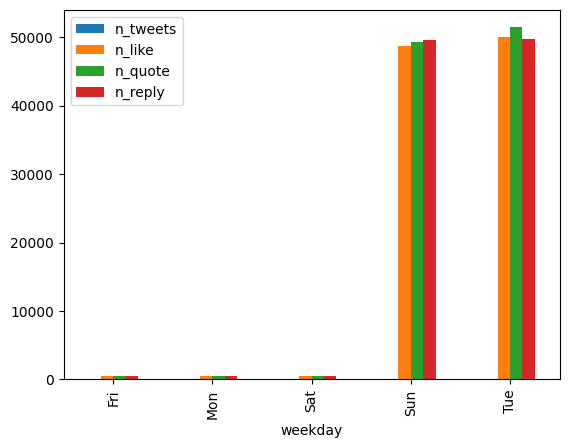

In [32]:
df.groupby("weekday").sum().loc[:].reset_index().plot(kind="bar", x="weekday", y=["n_tweets", "n_like", "n_quote", "n_reply"])